In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Database Details 

##### Numerical Features Informantion

- Popularity: popularity in the most part, is based on the total number of plays the track has had and how recent those plays are. Songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.

- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

##### Categorical Features Informantion

- Explicit: The is whether the song has adult related content.

- Key: Each number represents the 12 notes in music.
    - C  = 0
    - C# = 1
    - D  = 2
    - D# = 3
    - E  = 4
    - F  = 5
    - F# = 6
    - G  = 7
    - G# = 8
    - A  = 9
    - A# = 10
    - B  = 11


- Mode: Determine whether the musical key is major-1 or minor-0.

- Time signature: Typically 4, and it respresents the timing of the music.

<h5>Database</h5>

In [3]:
df = pd.read_csv('Files/tracks.csv')
df.head()

,arist_id,artist_name,track_name,track_id,popularity,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,2021-03-24,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.0,0.294,0.332,144.046,162194.0,4.0,1.0
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,2021-02-19,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.0,0.118,0.630,80.210,217365.0,4.0,0.0
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,2021-04-26,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.0,0.113,0.135,99.932,222981.0,4.0,0.0
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,2021-07-15,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.0,0.146,0.574,131.662,194718.0,5.0,0.0
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,2021-09-10,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.0,0.405,0.293,70.254,195429.0,3.0,0.0


In [4]:
df.shape

(45484, 20)

Take a look at the summary of the dataset

In [5]:
df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode
count,45484.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,45448.000000,4.544800e+04,45448.000000,45464.000000
mean,8.315078,0.719137,0.607262,5.521761,-8.451189,0.158248,0.193212,0.081472,0.187522,0.690800,117.285344,2.262553e+05,4.002662,0.594250
std,11.303806,0.121882,0.170422,3.598989,3.762525,0.126526,0.215503,0.224540,0.164332,0.196074,32.423927,1.166453e+05,0.312940,0.491042
min,0.000000,0.000000,0.000020,0.000000,-41.052000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.629000e+03,0.000000,0.000000
25%,0.000000,0.649000,0.486000,2.000000,-10.681000,0.058100,0.029500,0.000000,0.083900,0.566000,87.683000,1.896265e+05,4.000000,0.000000
50%,3.000000,0.736000,0.617000,6.000000,-7.707000,0.113000,0.112000,0.000002,0.123000,0.719000,115.980000,2.176270e+05,4.000000,1.000000
75%,12.000000,0.807000,0.733000,9.000000,-5.685000,0.235000,0.285000,0.001640,0.248000,0.848000,142.001000,2.437730e+05,4.000000,1.000000
max,85.000000,0.990000,0.998000,11.000000,0.160000,0.961000,0.995000,0.990000,0.999000,0.998000,244.835000,4.726439e+06,5.000000,1.000000


In [6]:
df.rename(columns={'arist_id':'artist_id'}, inplace=True)
df.describe(include=['object'])

,artist_id,artist_name,track_name,track_id,release_date
count,45484,45484,45484,45484,45484
unique,2781,2728,28374,43128,1834
top,4tHqkqP0DCD8Ek5OPvYTzH,Audio Idols,Intro,5mASEFyRHCxcJafabCmvCQ,2019-07-14
freq,510,510,55,4,624


## Handle Missing Data

In [7]:
# show count of missing data
df.isnull().sum()

artist_id            0
artist_name          0
track_name           0
track_id             0
popularity           0
explicit             0
release_date         0
danceability        36
energy              36
key                 36
loudness            36
speechiness         36
acousticness        36
instrumentalness    36
liveness            36
valence             36
tempo               36
duration_ms         36
time_signature      36
mode                20
dtype: int64

In [8]:
# Drop all rows with null values
df.dropna(inplace=True)

In [9]:
# Gather all the numerial features
features = df.loc[:, df.dtypes != object].columns.tolist()

In [10]:
# check to see the features with zeros
df[df[features] == 0].count()

artist_id               0
artist_name             0
track_name              0
track_id                0
popularity          12554
explicit            42137
release_date            0
danceability           23
energy                  0
key                  4927
loudness                0
speechiness            23
acousticness            2
instrumentalness    21445
liveness                7
valence                29
tempo                  23
duration_ms             0
time_signature         23
mode                18439
dtype: int64

In [11]:
df.drop(index=df[df['danceability'] == 0].index, inplace=True)
df.drop(index=df[df['speechiness'] == 0].index, inplace=True)
df.drop(index=df[df['acousticness'] == 0].index, inplace=True)
df.drop(index=df[df['liveness'] == 0].index, inplace=True)
df.drop(index=df[df['valence'] == 0].index, inplace=True)
df.drop(index=df[df['tempo'] == 0].index, inplace=True)

- There are too many zeros for instrumentalness; almost half the dataset so that field will be dropped.
- Rows with zeros in danceability, speechiness acousticness, liveness, valence and tempo can be assumed to be errors and removed

In [12]:
features.remove('instrumentalness')
df.drop(columns=['instrumentalness'], inplace=True)

In [13]:
# check to see the features with zeros
df[df[features] == 0].count()

artist_id             0
artist_name           0
track_name            0
track_id              0
popularity        12524
explicit          42107
release_date          0
danceability          0
energy                0
key                4923
loudness              0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
mode              18435
dtype: int64

## Handle Features

In [14]:
df.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature,mode
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,2021-03-24,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,162194.0,4.0,1.0
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,2021-02-19,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,217365.0,4.0,0.0
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,2021-04-26,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,222981.0,4.0,0.0
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,2021-07-15,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,194718.0,5.0,0.0
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,2021-09-10,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,195429.0,3.0,0.0


Convert date to year

In [15]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

In [16]:
df = df.drop(columns=['release_date'])

Convert ms to minutes

In [17]:
df['duration'] = df['duration_ms']/60000

In [18]:
df = df.drop(columns=['duration_ms'])

In [19]:
df.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,4.0,1.0,2021,2.703233
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,4.0,0.0,2021,3.622750
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,4.0,0.0,2021,3.716350
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,5.0,0.0,2021,3.245300
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,3.0,0.0,2021,3.257150


### Remove all the unrelated artists from the database

In [20]:
df_artist = pd.read_csv('Files/artists.csv')
df_artist.head()

,artist,id
0,$wizzz,2O6ph9RDudyvAR4Gj6VDoE
1,10Tik,6I1j34QzSTWe6u4qQWKYJe
2,1Biggs Don,6NuqWCp8VQhokoHpiUY1mS
3,450,2v6V75NbousiJwy2HV44VL
4,Admiral Bailey,1zYGgHaZVz4Q2NrPngXiCx


In [21]:
artists = df_artist['id'].values.tolist()

In [22]:
df = df[df['artist_id'].isin(artists)]

### Remove all duplicates

In [23]:
df.duplicated().sum()

1517

In [24]:
df_2 = df.drop_duplicates(subset=['track_id'], 
                   keep='first')

In [25]:
df_2.duplicated().sum()

0

### Round Tempo Values

In [27]:
tempo = round(df_2['tempo'])

In [28]:
df_2.iloc[:,-5] = tempo

C:\Users\Sharlmagne Henry\AppData\Local\Temp\ipykernel_17312\78785404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.iloc[:,-5] = tempo


## Plots

In [28]:
df_3 = df_2.copy()
df_3.drop(['artist_id', 'track_id', 'track_name', 'artist_name', 'explicit', 'time_signature'], axis='columns', inplace=True)

In [29]:
df_3.head()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration
0,13,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.0,1.0,2021,2.703233
1,10,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.0,0.0,2021,3.622750
2,10,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,100.0,0.0,2021,3.716350
3,10,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,132.0,0.0,2021,3.245300
4,12,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.0,0.0,2021,3.257150


<h5>Correlations</h5>

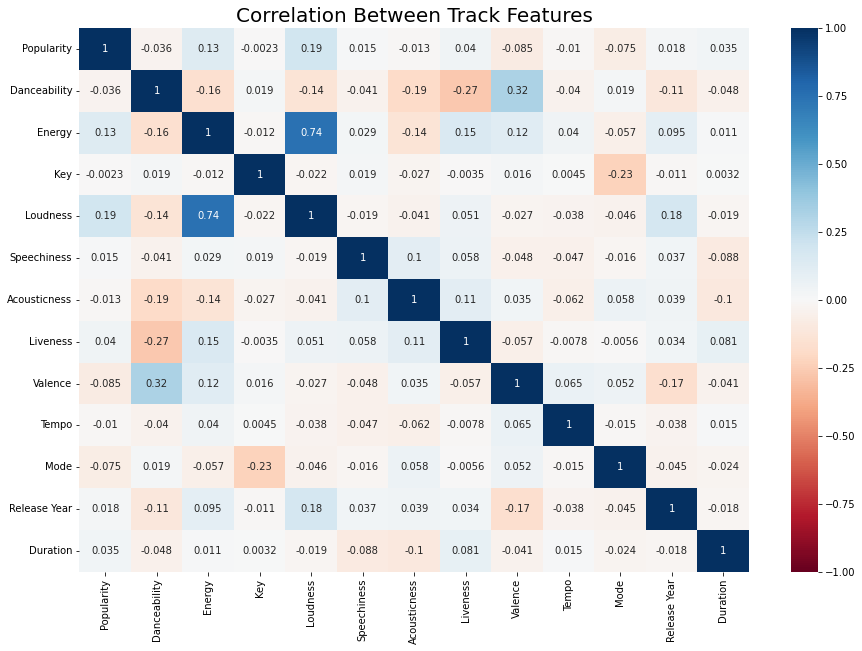

In [30]:
labels = ['Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
          'Liveness', 'Valence', 'Tempo', 'Mode', 'Release Year', 'Duration'
         ]

plt.figure(figsize=(15,10))
plt.title(label="Correlation Between Track Features", fontsize=20)
sns.heatmap(df_3.corr(), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            annot=True,
            xticklabels=labels,
            yticklabels=labels
           );

<h5>Distributions</h5>

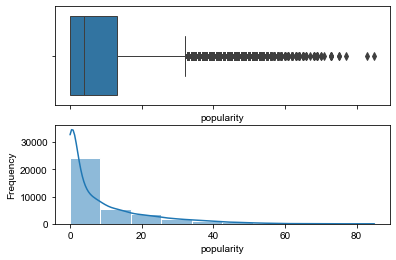

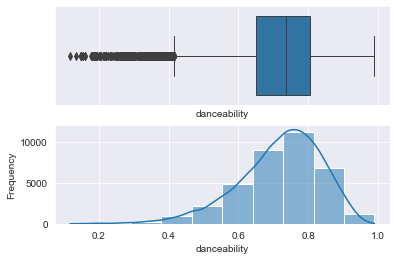

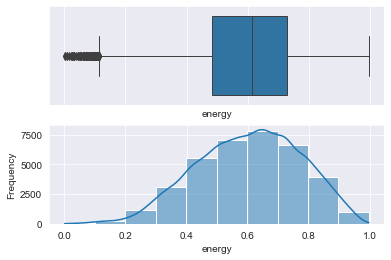

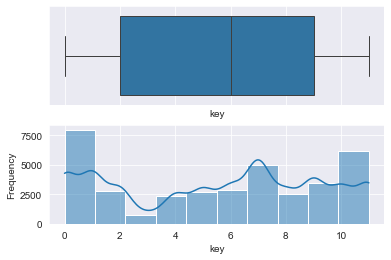

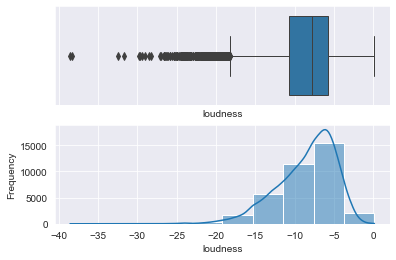

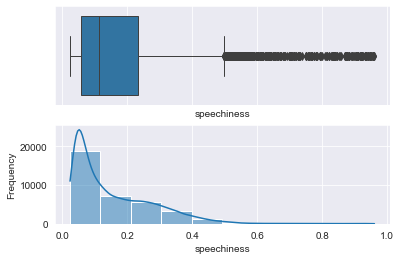

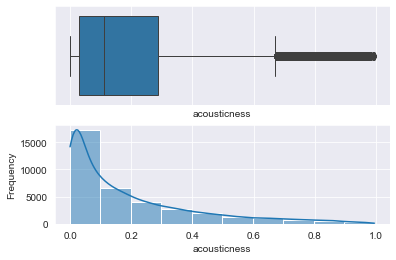

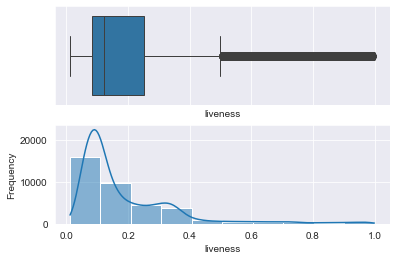

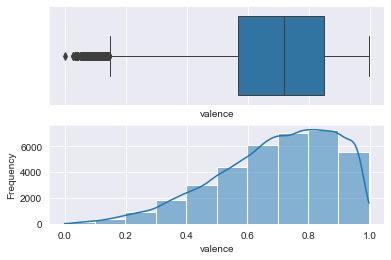

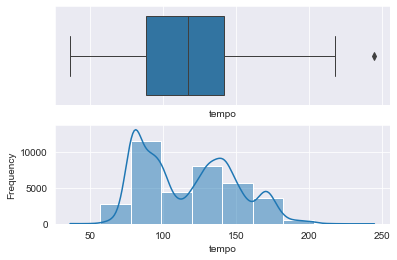

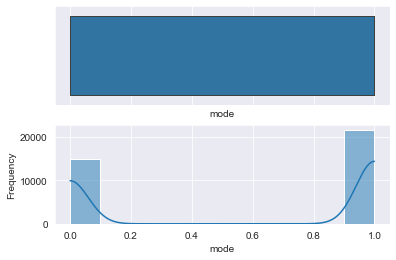

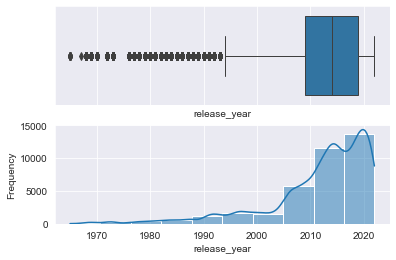

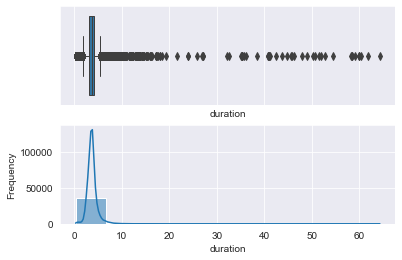

In [31]:
for i in df_3.columns:
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    
    sns.set_style('darkgrid')
    sns.boxplot(x=df_2[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df_2[i], ax=ax_hist , bins = 10,kde=True)

<h5>General Relationships</h5>

Line graph showing the changes in features over time

In [32]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']

In [33]:
df_4 = pd.pivot_table(df_3, index='release_year', values=features)

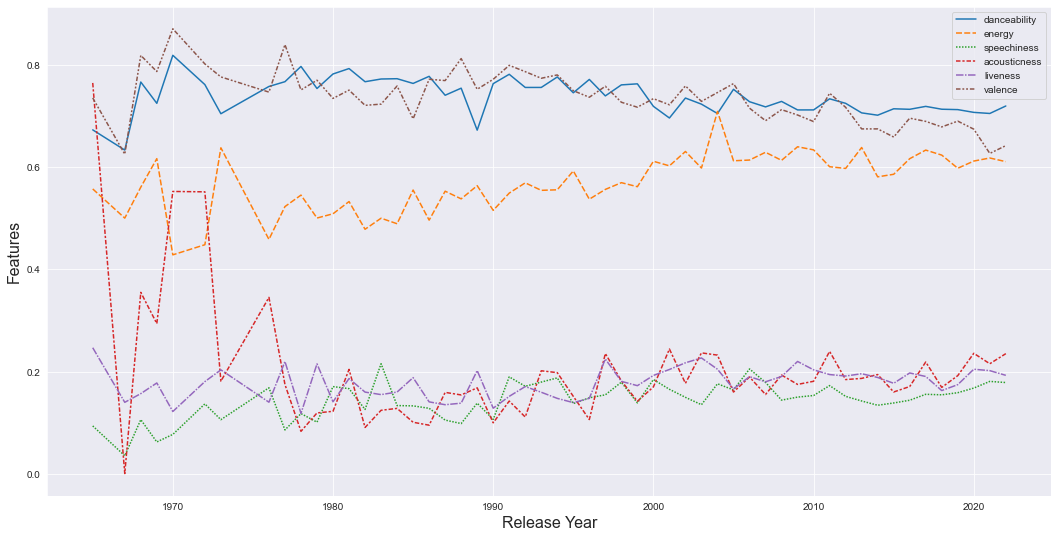

In [34]:
# %%time
plt.figure(figsize=(18,9))
plt.xlabel('Release Year', fontsize=16) 
plt.ylabel('Features', fontsize=16)


sns.lineplot(data=df_4[features]);


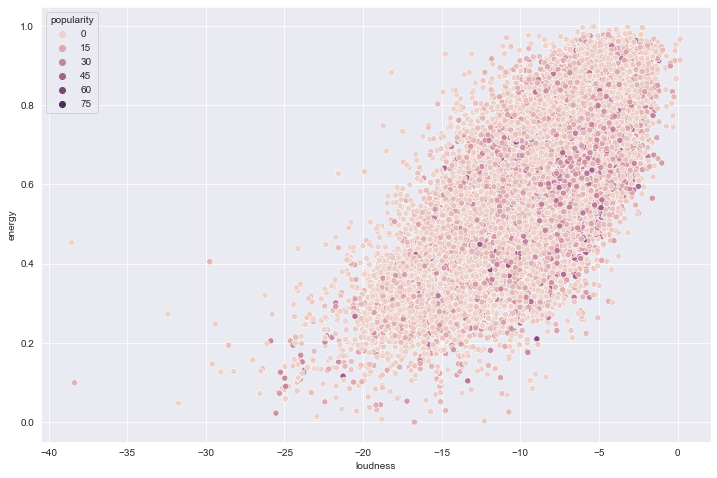

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['loudness'], y=df_3['energy'], hue=df_3['popularity']);

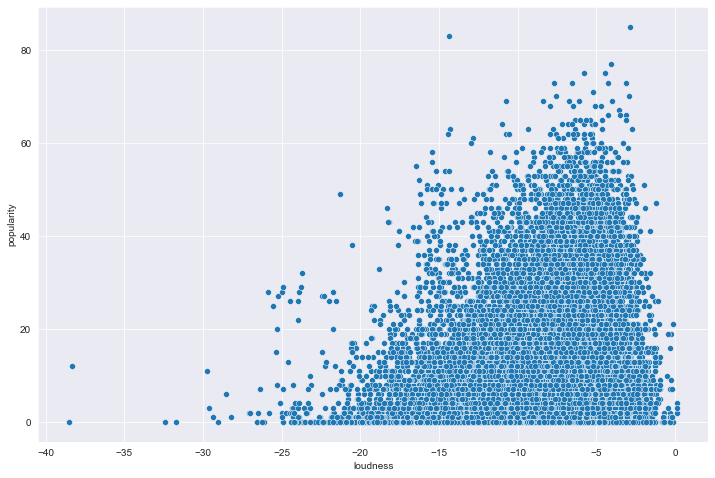

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['loudness'], y=df_3['popularity']);

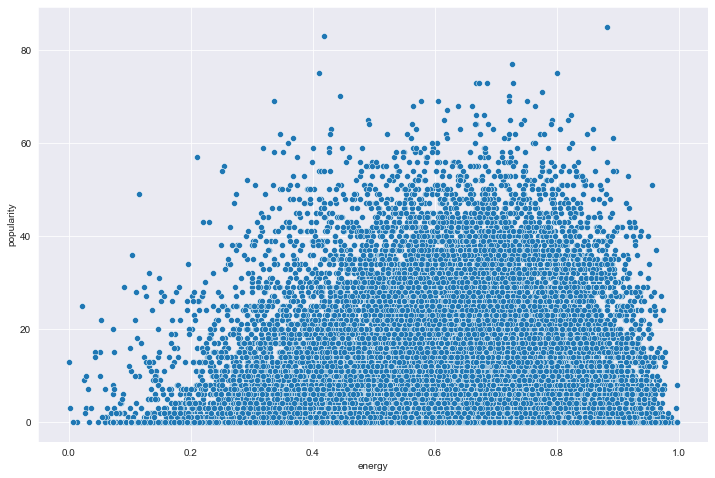

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['energy'], y=df_3['popularity']);

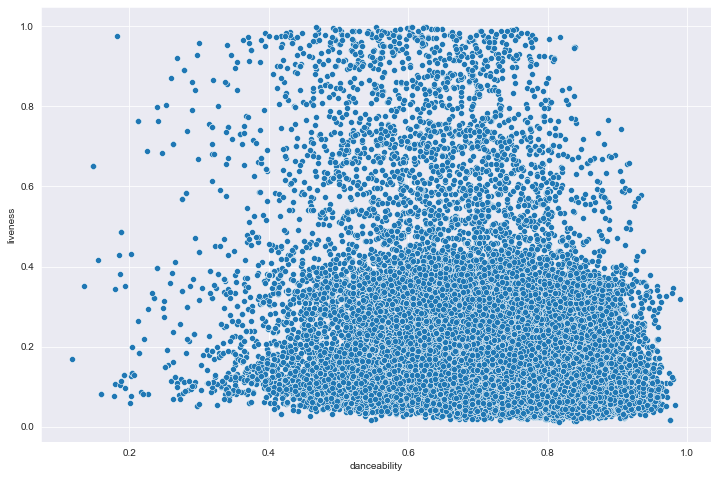

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['danceability'], y=df_3['liveness']);

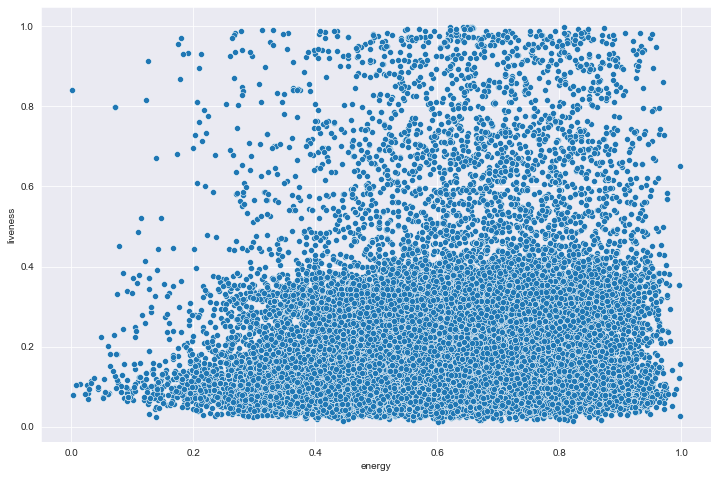

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['energy'], y=df_3['liveness']);

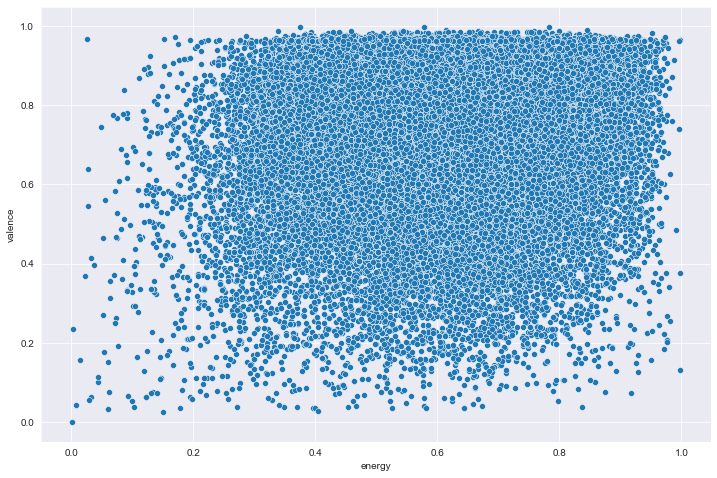

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['energy'], y=df_3['valence']);

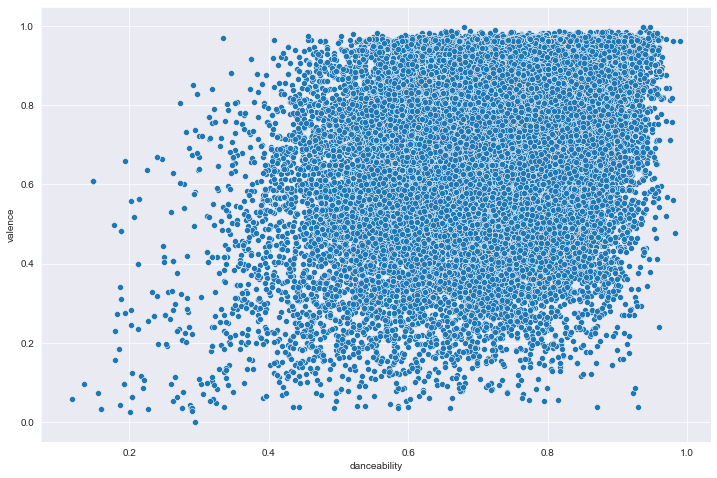

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_3['danceability'], y=df_3['valence']);

In [43]:
df_2.to_csv('Files/tracks_cleaned.csv', index=False)